In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score

In [2]:
data = pd.read_csv('./train (1).csv')

In [3]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [4]:
print(data.shape)
data.head(50)

(5282, 20)


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
5,25,19.80,475.2,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
6,27,90.15,2423.4,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),0
7,1,45.70,45.7,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
8,50,105.95,5341.8,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),1
9,72,61.20,4390.25,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0


In [5]:
# Проверка на пустые записи
np.sum(data.isna())

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [6]:
data.loc[data['TotalSpent'] == ' ']

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [7]:
# строк с пустыми значениями очень мало, так что просто удалю их
empty_indexes = data.loc[data['TotalSpent'] == ' '].index
data = data.drop(empty_indexes)
data["TotalSpent"] = data["TotalSpent"].astype(np.float64)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5273 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5273 non-null   int64  
 1   MonthlySpending           5273 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5273 non-null   object 
 4   IsSeniorCitizen           5273 non-null   int64  
 5   HasPartner                5273 non-null   object 
 6   HasChild                  5273 non-null   object 
 7   HasPhoneService           5273 non-null   object 
 8   HasMultiplePhoneNumbers   5273 non-null   object 
 9   HasInternetService        5273 non-null   object 
 10  HasOnlineSecurityService  5273 non-null   object 
 11  HasOnlineBackup           5273 non-null   object 
 12  HasDeviceProtection       5273 non-null   object 
 13  HasTechSupportAccess      5273 non-null   object 
 14  HasOnlin

In [8]:
y_data = data[target_col]
X_data = data.drop(target_col, axis=1)

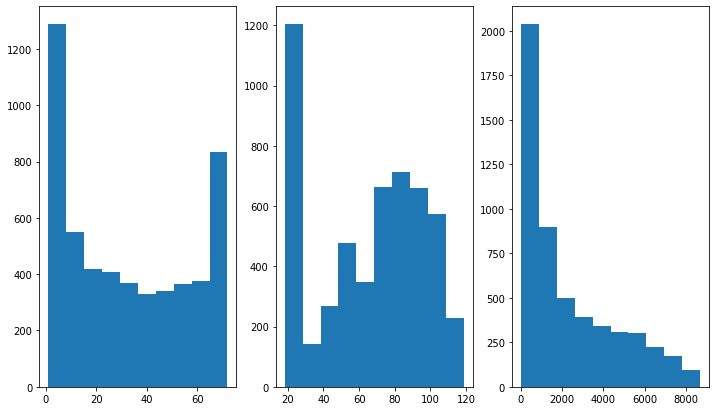

In [9]:
#далее визуализация и анализ данных
plt.figure(figsize=(12,7))
for i in range(len(num_cols)):
    plt.subplot(1,3,i+1)
    plt.hist(X_data[num_cols[i]])

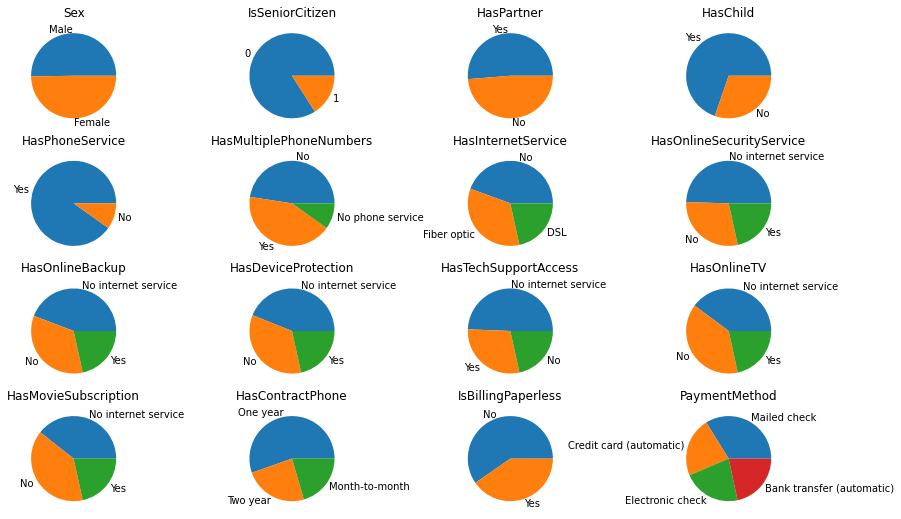

In [10]:
plt.figure(figsize=(15,9))
for i in range(len(cat_cols)):
    plt.subplot(4,4,i+1)
    plt.title(cat_cols[i])
    plt.pie(X_data[cat_cols[i]].value_counts(),labels=data[cat_cols[i]].unique())

([<matplotlib.patches.Wedge at 0x21fd78798d0>,
 [Text(-0.7467590456276939, 0.8076824424074204, '0'),
  Text(0.7467590456276938, -0.8076824424074206, '1')])

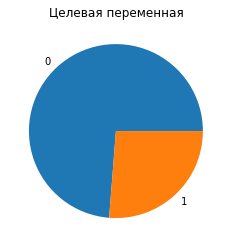

In [11]:
plt.title("Целевая переменная")
plt.pie(y_data.value_counts(),labels=y_data.unique())

In [12]:
import seaborn as sns

<AxesSubplot:xlabel='MonthlySpending', ylabel='TotalSpent'>

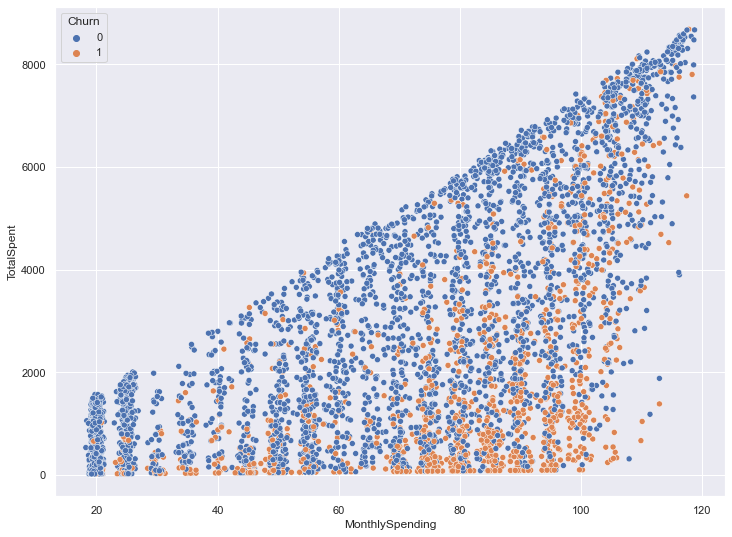

In [13]:
sns.set(rc={'figure.figsize':(12,9)})
sns.scatterplot(x='MonthlySpending', y='TotalSpent', data=data, hue='Churn')

In [14]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [15]:
X_cat = X_data[cat_cols]
X_num = X_data[num_cols]

X_cat = pd.get_dummies(X_cat)
X_cat = np.array(X_cat) 

std = StandardScaler()
X_num = std.fit_transform(X_num)

X = np.hstack((X_num,X_cat))
y = np.array(y_data)

grid_params = {
    'C' : [10000,1000,100, 10, 1, 0.1, 0.01, 0.001]
}


clf_grid = GridSearchCV(LogisticRegression(),grid_params,scoring='roc_auc',n_jobs=-1)
clf_grid.fit(X,y)
clf_grid.best_params_, clf_grid.best_score_

({'C': 1000}, 0.8448348178293557)

In [16]:
#подбор гиперпараметров через GridSearchCV
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat' , OneHotEncoder(), cat_cols)
    ]
)

grid_params = {
    'columntransformer__cat__drop' : ['first',None],
    'columntransformer__num__with_mean' : [True, False],
    'columntransformer__num__with_std' : [True,False],
    'logisticregression__C' : [10000,1000,100, 10, 1, 0.1, 0.01, 0.001],
}

clf_2 = make_pipeline(preprocessor,LogisticRegression())
clf_grid_2 = GridSearchCV(clf_2, grid_params,scoring='roc_auc',n_jobs=-1)
clf_grid_2.fit(X_data,y_data)
clf_grid_2.best_params_, clf_grid_2.best_score_

({'columntransformer__cat__drop': None,
  'columntransformer__num__with_mean': True,
  'columntransformer__num__with_std': True,
  'logisticregression__C': 1000},
 0.8448375976383872)

In [17]:
grid_params = {
    'onehotencoder__drop' : ['first',None],
    'standardscaler__with_std' : [True,False],
    'logisticregression__C' : [10000,1000,100, 10, 1, 0.1, 0.01, 0.001]
}

clf_3 = make_pipeline(OneHotEncoder(handle_unknown='ignore'),StandardScaler(with_mean=False),LogisticRegression())
clf_grid_3 = GridSearchCV(clf_3, grid_params, scoring='roc_auc',n_jobs=-1)
clf_grid_3.fit(X_data,y_data)
clf_grid_3.best_params_, clf_grid_3.best_score_

({'logisticregression__C': 0.1,
  'onehotencoder__drop': None,
  'standardscaler__with_std': False},
 0.8439696448057863)

In [18]:
# Тут лучше всего
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), num_cols),
        ('cat' , OneHotEncoder(), cat_cols)
    ]
)

grid_params = {
    'columntransformer__cat__drop' : ['first',None],
    'columntransformer__num__with_scaling' : [False, True],
    'logisticregression__C' : [10000,1000,100, 10, 1, 0.1, 0.01, 0.001],
    'columntransformer__num__unit_variance' : [False,True]
}

clf_4 = make_pipeline(preprocessor,LogisticRegression())
clf_grid_4 = GridSearchCV(clf_4, grid_params,scoring='roc_auc',n_jobs=-1)
clf_grid_4.fit(X_data,y_data)
clf_grid_4.best_params_, clf_grid_4.best_score_

({'columntransformer__cat__drop': 'first',
  'columntransformer__num__unit_variance': False,
  'columntransformer__num__with_scaling': True,
  'logisticregression__C': 100},
 0.8448450531709083)

In [19]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

X_train, X_valid, y_train, y_valid = train_test_split(X_data,y_data,train_size=0.8,random_state=1)
clf = CatBoostClassifier(cat_features=cat_cols, random_state=1)
#clf.fit(X_train,y_train)

# prediction = clf.predict(X_valid)
# roc_auc_score(prediction, y_valid)

<frozen importlib._bootstrap>:241: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


In [20]:
grid_params = {
    'max_depth' : [2,4],
    'learning_rate' : [0.1,0.01,0.005],
    'num_trees' : np.linspace(120,160,5)
}

clf_grid_boost = GridSearchCV(clf,grid_params,scoring='roc_auc',n_jobs=-1)
clf_grid_boost.fit(X_data,y_data)

0:	learn: 0.6615887	total: 145ms	remaining: 21.6s
1:	learn: 0.6331842	total: 149ms	remaining: 11s
2:	learn: 0.6089112	total: 154ms	remaining: 7.56s
3:	learn: 0.5893058	total: 160ms	remaining: 5.84s
4:	learn: 0.5725921	total: 165ms	remaining: 4.8s
5:	learn: 0.5590475	total: 171ms	remaining: 4.1s
6:	learn: 0.5466577	total: 175ms	remaining: 3.58s
7:	learn: 0.5353693	total: 181ms	remaining: 3.21s
8:	learn: 0.5257712	total: 186ms	remaining: 2.92s
9:	learn: 0.5181384	total: 193ms	remaining: 2.7s
10:	learn: 0.5084926	total: 198ms	remaining: 2.51s
11:	learn: 0.5003637	total: 204ms	remaining: 2.35s
12:	learn: 0.4924012	total: 210ms	remaining: 2.21s
13:	learn: 0.4850397	total: 215ms	remaining: 2.09s
14:	learn: 0.4786432	total: 221ms	remaining: 1.99s
15:	learn: 0.4731326	total: 226ms	remaining: 1.9s
16:	learn: 0.4686216	total: 232ms	remaining: 1.81s
17:	learn: 0.4633178	total: 237ms	remaining: 1.74s
18:	learn: 0.4585918	total: 243ms	remaining: 1.68s
19:	learn: 0.4546512	total: 248ms	remaining: 1.

GridSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x0000021FD86DEB00>,
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.005],
                         'max_depth': [2, 4],
                         'num_trees': array([120., 130., 140., 150., 160.])},
             scoring='roc_auc')

In [21]:
clf_grid_boost.best_params_, clf_grid_boost.best_score_

({'learning_rate': 0.1, 'max_depth': 2, 'num_trees': 150.0},
 0.8480567362809065)